In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Investigating and comparing weather files

The weather files I generated seem to be giving weird outputs in maizsim, and also makes the model run really slowly. I'm suspecting that something migth be off in the weather files. Am going to compare it against the standard hourly weather file I got from Dennis.

In [389]:
cols = ['date', 'hour', 'solrad', 'temp', 'rain', 'wind', 'rh', 'co2']
wea_iowa = pd.read_csv('/home/disk/eos8/ach315/maizsim_200102/MAIZSIM/testruns/Iowa06.wea', skiprows=[0], sep='\s+')
wea_iowa.columns = cols
wea_iowa.head()

,date,hour,solrad,temp,rain,wind,rh,co2
83,03/24/2006,0,0.0,-0.327,0.0,8.17790,90.5,370.0
83,03/24/2006,1,0.0,-0.724,0.0,7.54700,91.4,370.0
83,03/24/2006,2,0.0,-0.957,0.0,7.27825,91.2,370.0
83,03/24/2006,3,0.0,-1.159,0.0,7.74175,92.0,370.0
83,03/24/2006,4,0.0,-1.239,0.0,8.77815,94.1,370.0


In [ ]:
fig, ax = plt.subplots(2,2)

ax[0,0].plot(test.leaves)
ax[0,1].plot(test.LAI)
ax[1,0].plot(test.leaf_WP)
ax[1,1].plot(test.dm_total)

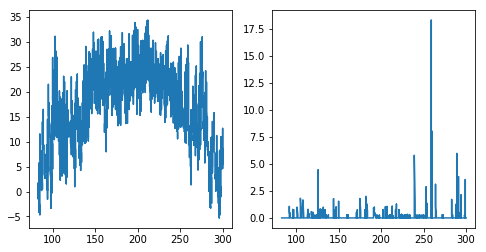

In [420]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

ax1.plot(wea_iowa.temp)
ax2.plot(wea_iowa.rain)

In [434]:
wea_upscale = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/94910_1990.txt', sep='\s+')

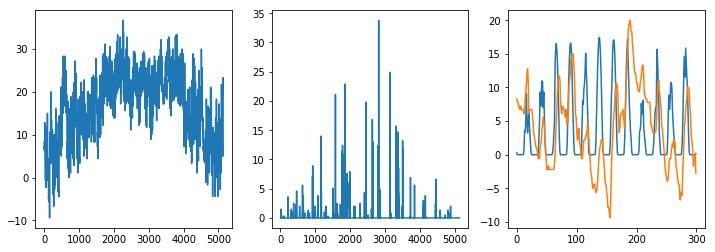

In [439]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(wea_upscale.temp)
ax2.plot(wea_upscale.precip)
ax3.plot(wea_upscale.solrad[:300]/50)
ax3.plot(wea_upscale.temp[:300])

In [440]:
wea_upscale = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/03945_1983.txt', sep='\s+')

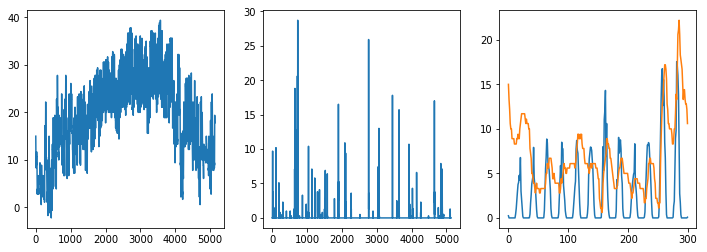

In [441]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(wea_upscale.temp)
ax2.plot(wea_upscale.precip)
ax3.plot(wea_upscale.solrad[:300]/50)
ax3.plot(wea_upscale.temp[:300])

### Plotting out site-year average temp & annual precip

In [386]:
files = glob.glob('/home/disk/eos8/ach315/upscale/weadata/data/control/*')

precip_all = list()
temp_all = list()

for i in files:
    df_wea = pd.read_csv(i, sep='\s+')
    precip = df_wea.precip.sum()/10
    precip_all.append(precip)
    temp = df_wea.temp.mean()
    temp_all.append(temp)
    

Text(0.5,0.98,'average site-year conditions')

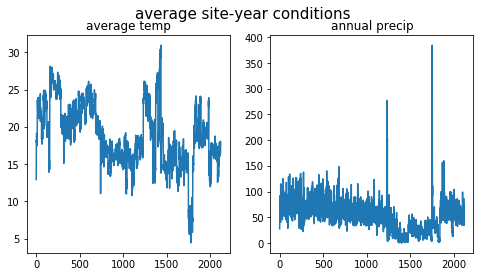

In [433]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))

ax1.plot(temp_all)
ax1.set_title('average temp')
ax2.plot(precip_all)
ax2.set_title('annual precip')
fig.suptitle('average site-year conditions', fontsize=15)

### Quick plotting of maizsim outputs

In [461]:
cols = ['jday', 'time', 'leaves', 'mature_lvs', 'dropped_lvs', 'LA', 'LA_dead', 'LAI', 'RH', 
        'leaf_WP', 'PFD', 'solrad', 'temp_soil', 'temp_air', 'temp_can', 'ET_dmd', 'ET_suply',
        'Pn', 'Pg', 'resp', 'av_gs', 'LAI_sunlit', 'LAI_shaded', 'PFD_sunlit', 'PFD_shaded', 
        'An_sunlit', 'An_shaded', 'Ag_sunlit', 'Ag_shaded', 'gs_sunlit', 'gs_shaded', 'VPD',
        'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL', 'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf', 'dm_dropleaf', 
        'df_stem', 'df_root', 'roil_rt', 'mx_rootdept', 'available_water', 'soluble_c', 'note']

In [466]:
test = pd.read_csv('/home/disk/eos8/ach315/upscale/runs/03945_1983/out1.txt')
test.columns = cols
test.head()

,jday,time,leaves,mature_lvs,dropped_lvs,LA,LA_dead,LAI,RH,leaf_WP,...,dm_ear,dm_totleaf,dm_dropleaf,df_stem,df_root,roil_rt,mx_rootdept,available_water,soluble_c,note
04/01/1983,30407,0,0.0,0,0,0.0,0.0,0.0,85.97,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1983,30407,1,0.0,0,0,0.0,0.0,0.0,85.97,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1983,30407,2,0.0,0,0,0.0,0.0,0.0,85.97,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1983,30407,3,0.0,0,0,0.0,0.0,0.0,88.99,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1983,30407,4,0.0,0,0,0.0,0.0,0.0,89.57,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""


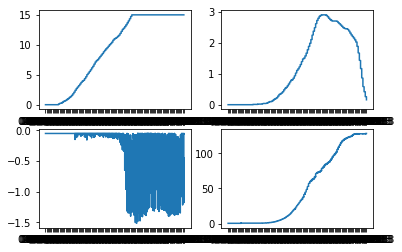

In [467]:
# 03945_1983
fig, ax = plt.subplots(2,2)

ax[0,0].plot(test.leaves)
ax[0,1].plot(test.LAI)
ax[1,0].plot(test.leaf_WP)
ax[1,1].plot(test.dm_total)

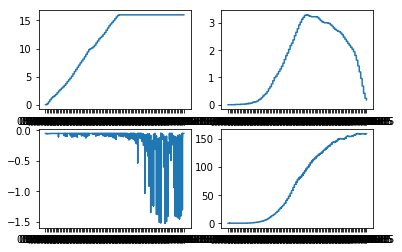

In [454]:
# 13866_1985
fig, ax = plt.subplots(2,2)

ax[0,0].plot(test.leaves)
ax[0,1].plot(test.LAI)
ax[1,0].plot(test.leaf_WP)
ax[1,1].plot(test.dm_total)

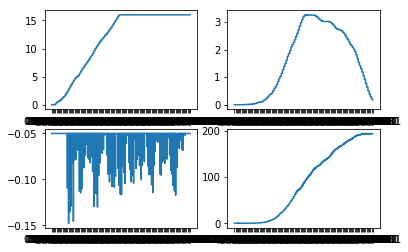

In [456]:
# 14745_1981
fig, ax = plt.subplots(2,2)

ax[0,0].plot(test.leaves)
ax[0,1].plot(test.LAI)
ax[1,0].plot(test.leaf_WP)
ax[1,1].plot(test.dm_total)

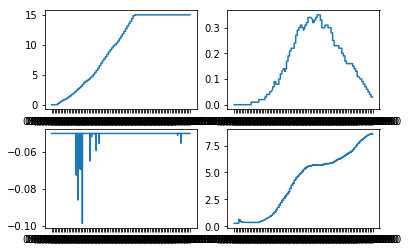

In [458]:
# 94910_1990
fig, ax = plt.subplots(2,2)

ax[0,0].plot(test.leaves)
ax[0,1].plot(test.LAI)
ax[1,0].plot(test.leaf_WP)
ax[1,1].plot(test.dm_total)